<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/Portfolio_SP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program optimizes a stock portfolio


In [4]:
#Import libraries
import pandas as pd 
import numpy as np
import requests
import time
import pandas_datareader as web
import matplotlib.pyplot as plt

import bs4 as bs
import datetime as dt
import os
import pickle
import fix_yahoo_finance as yf

In [5]:
SP500 = []

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

SP500 = save_sp500_tickers()

In [6]:
df = pd.DataFrame()
# = ['GOOG', 'AAPL', 'FB', 'BABA', 'AMZN', 'GE', 'AMD', 'WMT', 'BAC', 'GM','T', 'UAA', 'SHLD', 'XOM', 'RRC', 'BBY', 'MA', 'PFE', 'JPM', 'SBUX']
for symbol in SP500:
  df[symbol] = web.DataReader(symbol, data_source = "yahoo", start = "2019-01-01", end = "2021-03-01")['Adj Close']
  time.sleep(0.1)

In [7]:
df

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,...,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VFC,VIAC,VTRS,V,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WST,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,176.638840,67.034943,79.101799,309.959991,136.179626,46.350380,224.570007,18.830000,156.258942,13.184110,43.072632,64.609894,152.843842,59.009998,59.860054,75.072716,105.562904,98.050003,202.119995,78.993782,38.524574,77.756592,1054.680054,1045.849976,41.543232,1539.130005,8.344234,60.357964,31.963160,67.802513,92.319603,36.799793,151.136963,85.562866,101.827194,71.464157,66.439034,179.889648,39.007011,82.134567,...,67.025421,112.669998,51.070866,147.759995,107.035225,50.949287,164.080002,63.601051,43.558319,27.920000,131.061066,52.378757,95.391243,46.608845,69.796913,89.610855,62.573547,107.654343,85.056160,183.410004,63.428158,43.247082,60.934448,95.568115,36.312473,15.724566,35.753704,19.966883,100.208344,19.121933,145.550812,100.250526,45.400452,84.360565,64.636063,87.819199,156.240005,100.576180,38.719910,83.337715
2019-01-03,169.987732,63.871284,76.495514,302.290009,131.530212,44.704514,215.699997,17.049999,161.137100,13.174811,41.984459,62.229683,148.744751,57.700001,56.551788,69.863472,106.434952,100.209999,184.779999,77.658539,38.590107,76.480324,1025.469971,1016.059998,41.315765,1500.280029,8.344234,60.509964,29.581665,67.644478,90.517570,35.991718,152.043350,85.900223,99.129669,70.427460,64.548935,177.152435,36.699539,77.173225,...,65.819046,109.800003,51.932217,142.589996,103.764557,51.131184,163.729996,61.729115,44.006687,27.230000,126.338089,52.239914,94.413780,45.836533,68.437630,89.150032,61.920597,105.046211,84.826073,176.339996,63.597103,42.906197,62.057335,93.704514,33.835327,15.476862,35.146927,20.643887,99.874084,19.283983,142.497406,99.280663,45.221561,81.184296,62.420292,85.610275,146.880005,98.756989,38.505726,80.457184
2019-01-04,176.981140,65.694260,78.959961,313.440002,136.644577,46.488358,226.190002,19.000000,157.139572,13.611803,42.504887,64.383667,154.778442,59.380001,58.381065,73.275429,107.524979,106.000000,186.710007,77.483109,39.058205,78.737595,1078.069946,1070.709961,42.377300,1575.390015,8.344234,61.365028,31.530161,68.267288,94.596352,37.319923,152.650848,86.546028,104.439850,71.243378,66.990303,183.208115,37.907051,79.046875,...,68.311653,118.650002,51.680996,148.970001,108.345467,51.258514,172.699997,63.850632,44.998814,28.840000,131.780884,53.116367,99.242477,46.544483,70.181076,89.706871,63.980610,108.286606,87.079018,179.779999,64.066391,44.177628,61.830940,97.382118,35.268467,15.678694,36.663872,21.348709,104.758217,20.085705,146.348175,103.284927,45.664082,84.943359,65.053917,87.838394,152.970001,102.129860,39.688366,83.613907
2019-01-07,176.574112,66.678070,80.112411,314.799988,137.119217,47.799141,229.259995,20.570000,159.445038,13.676887,42.731987,65.750809,153.169464,61.240002,58.497826,73.602203,108.188477,107.940002,189.919998,78.292053,38.786716,78.613770,1075.920044,1068.390015,41.096710,1629.510010,8.523681,60.661980,32.425678,67.886169,95.109818,37.533558,153.595795,85.630333,104.920883,71.752113,66.882034,185.673523,38.190594,79.543961,...,68.382629,121.930000,51.968113,151.399994,108.453812,51.585930,175.850006,65.054024,45.475792,29.750000,134.157166,54.131653,101.216972,46.679634,69.511269,90.762917,64.348488,109.225136,87.289940,187.240005,63.775425,43.892014,62.564434,97.689423,36.521275,15.632826,36.728230,21.775311,107.813118,20.597443,147.427582,105.119019,45.466366,87.187141,64.091835,87.742371,155.289993,102.169182,39.846676,84.117012
2019-01-08,177.314148,65.877518,80.484734,318.420013,140.586914,49.247898,232.679993,20.750000,158.336838,13.993008,42.864464,66.714699,151.407227,62.450001,59.013531,74.323051,110.700294,108.610001,19

In [8]:
assets = df.columns
assets

Index(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
       'AES',
       ...
       'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=505)

In [9]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 1.3MB 6.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.11-cp37-cp37m-linux_x86_64.whl size=2725485 sha256=7dd340e27238b08de7ce22dd3178117ee408cb196550300acb51976ddf19f56d
  Stored in directory: /root/.cache/pip/wheels/df/d4/eb/c74e09a39bc4ac09b3a8d2a48c1c6009f391056d8c87bf68aa
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [10]:
#Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [36]:
#Calculate the expected returns and covariuance
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)
print(mu)
print(s)

/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.
  "Could not fix matrix. Please try a different risk model.", UserWarning


MMM    -0.000601
ABT     0.321408
ABBV    0.157513
ABMD    0.021152
ACN     0.345591
          ...   
YUM     0.084103
ZBRA    0.733894
ZBH     0.251709
ZION    0.174814
ZTS     0.344420
Length: 505, dtype: float64
           MMM       ABT      ABBV  ...       ZBH      ZION       ZTS
MMM   0.099645  0.047728  0.038535  ...  0.057543  0.074803  0.043539
ABT   0.047728  0.093508  0.048711  ...  0.049754  0.040059  0.061857
ABBV  0.038535  0.048711  0.094975  ...  0.047922  0.046550  0.047339
ABMD  0.039259  0.059561  0.031898  ...  0.054356  0.045499  0.039787
ACN   0.056457  0.060083  0.049654  ...  0.070999  0.069734  0.064132
...        ...       ...       ...  ...       ...       ...       ...
YUM   0.050702  0.044933  0.037583  ...  0.074572  0.059818  0.059891
ZBRA  0.072313  0.065498  0.054956  ...  0.071067  0.091092  0.069191
ZBH   0.057543  0.049754  0.047922  ...  0.142084  0.093229  0.059487
ZION  0.074803  0.040059  0.046550  ...  0.093229  0.212442  0.041489
ZTS   0.043539 

In [37]:
#Optimize sharpe ratio
#ef = EfficientFrontier(mu,s,weight_bounds=(-1,1))
ef = EfficientFrontier(mu,s)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('MMM', 0.0), ('ABT', 0.0), ('ABBV', 0.0), ('ABMD', 0.0), ('ACN', 0.0), ('ATVI', 0.0), ('ADBE', 0.0), ('AMD', 0.0), ('AAP', 0.0), ('AES', 0.0), ('AFL', 0.0), ('A', 0.0), ('APD', 0.0), ('AKAM', 0.0), ('ALK', 0.0), ('ALB', 0.0), ('ARE', 0.0), ('ALXN', 0.0), ('ALGN', 0.0), ('ALLE', 0.0), ('LNT', 0.0), ('ALL', 0.0), ('GOOGL', 0.0), ('GOOG', 0.0), ('MO', 0.0), ('AMZN', 0.0), ('AMCR', 0.0), ('AEE', 0.0), ('AAL', 0.0), ('AEP', 0.0), ('AXP', 0.0), ('AIG', 0.0), ('AMT', 0.0), ('AWK', 0.0), ('AMP', 0.0), ('ABC', 0.0), ('AME', 0.0), ('AMGN', 0.0), ('APH', 0.0), ('ADI', 0.0), ('ANSS', 0.0), ('ANTM', 0.0), ('AON', 0.0), ('AOS', 0.0), ('APA', 0.0), ('AAPL', 0.0), ('AMAT', 0.0), ('APTV', 0.0), ('ADM', 0.0), ('ANET', 0.0), ('AJG', 0.0), ('AIZ', 0.0), ('T', 0.0), ('ATO', 0.0), ('ADSK', 0.0), ('ADP', 0.0), ('AZO', 0.0), ('AVB', 0.0), ('AVY', 0.0), ('BKR', 0.0), ('BLL', 0.0), ('BAC', 0.0), ('BK', 0.0), ('BAX', 0.0), ('BDX', 0.0), ('BRK-B', 0.0), ('BBY', 0.0), ('BIO', 0.0), ('BIIB', 0.0), ('B

(2.4393580157118437, 0.41306730316943147, 5.8570552477727205)

In [38]:
pip install pulp

In [39]:
#Get the discrete allocation 
from pypfopt.discrete_allocation import  DiscreteAllocation, get_latest_prices

portfolio_val = 10000
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = portfolio_val)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds Remaining: $', leftover)

Discrete allocation: {'CARR': 86, 'CLX': 7, 'ENPH': 17, 'TGT': 8, 'TSLA': 1}
Funds Remaining: $ 165.60999298095703


In [40]:
#Create a function to get the companies name
def get_company_name(symbol):
  url = 'http://d.yimg.com/autoc.finance.yahoo.com/autoc?query='+symbol+'&region=1&lang=en'
  result = requests.get(url).json()
  for r in result['ResultSet']['Result']:
    if r['symbol'] == symbol:
      return r['name']


In [28]:
#Store the company name into a list
company_name = []
for symbol in allocation:
  company_name.append(get_company_name(symbol))

In [29]:
#Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [30]:
#Creare a data for the portfolio
portfolio_df = pd.DataFrame(columns=['Company_name','Company_Ticker', 'Discrete_val_'+str(portfolio_val)]) 

portfolio_df['Company_name'] =  company_name
portfolio_df['Company_Ticker'] =  allocation
portfolio_df['Discrete_val_'+str(portfolio_val)] =  discrete_allocation_list

portfolio_df

,Company_name,Company_Ticker,Discrete_val_10000
0,"Enphase Energy, Inc.",ENPH,53


In [31]:
from pypfopt import plotting

/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1246: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


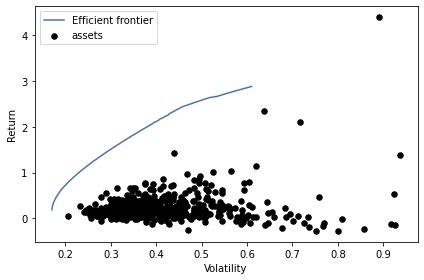

In [32]:
# Efficient Frontier
ef = EfficientFrontier(mu, s)
ef.add_constraint(lambda w: w[0] >= 0.2)
ef.add_constraint(lambda w: w[2] == 0.15)
ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

In [33]:
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1246: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


<Figure size 432x288 with 0 Axes>

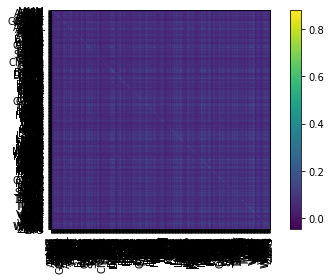

In [34]:
cov = plotting.plot_covariance(s, plot_correlation=False, show_tickers=True)